# Tarea 1 Inteligencia Artificial
# Alumno: Javier Ramos

---

En el siguiente cuadro de codigo se instalan las  librerias que se usaran en el desarrollo de esta tarea, dichas librerias se listan a continuacion:

*   bnlearn: Libreria necesaria para el trabajo y manejo de las redes bayesianas
*   PyDTMC: Libreria Utilizada para ayudar en el manejo de las cadenas de markov


Ademas se actualiza a una version de matplotlib para que funcione bnlearn correctamente (lo solicita al ejecutarse el pip de bnlearn, puede ser mayor a la 3.3.4, pero no menor, el segundo cuadro de codigo esta para verificar la version de matplotlib, en caso de que sea menor a 3.3.4, dirigirse a "Entorno de ejecucio -> Reiniciar entorno de ejecucion, y verificar si se arreglo en el segundo cuadro, si no se arreglo, realizar la instalacion nuevamente)

In [ ]:
!pip install -q PyDTMC
!pip install -q --upgrade PyDTMC
!pip install -q --upgrade matplotlib
!pip install -q bnlearn


In [ ]:
import matplotlib
matplotlib.__version__


'3.5.3'

#Enunciado 1:
A continuacion , se comienza el desarrollo del Enunciado 1 de la tarea, para esto primero se debera subir el archivo "dataset18.csv", de esta forma el Colab-notebook podra trabajar con los datos que se encuentran dentro.
Para esto se pide que corra el siguiente cuadro de codigo y cuando de la opcion de elegir archivo, suba el archivo anteriormente mencionado.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset18.csv to dataset18.csv


El siguiente cuadro de codigo puede demorar un poco al ejecutarse, dado que se usa la libreria bnlearn para aprender la red bayesiana en base a los datos y generar un grafo aciclico dirigido, el cual se almacena en la variable DAG.

In [ ]:
# Importacion de las librerias necesarias
import bnlearn as bn
from pandas import read_csv
import io

#Se carga el dataset entregado en un dataframe de pandas
df = read_csv(io.BytesIO(uploaded['dataset18.csv']),usecols=[i for i in range(7)])

dfhot, dfnum = bn.df2onehot(df)

# Se aprende la estructura de la red bayesiana
DAG = bn.structure_learning.fit(dfnum)



[df2onehot] >Auto detecting dtypes.



100%|██████████| 7/7 [00:18<00:00,  2.65s/it]


[df2onehot] >Set dtypes in dataframe..


100%|██████████| 7/7 [00:02<00:00,  2.60it/s]


[df2onehot] >Total onehot features: 14
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bic]


En el cuadro anterior se especifica las columnas que el metodo "read_csv" debe utilizar, se puede ver que se borro la ultima columna, dado que revisando los datos, se pudo observar que eran solo 0, por lo que no aportaban valor a la red, ademas se utilizo este metodo dado que al importarlos normalmente, la primera fila de datos se concideraba erroneamente como indice, con esta implementacion esto queda solucionado.

Una vez aprendida la estructura de la red de bayes, se  procede a mostrar la red obtenida de manera grafica, ademas de realizar el parameter learning para su uso posterior en las inferencias.

---
(Como nota aparte, a veces el modelo puede quedar distinto al modelo con el que se realizo este informe, debido al metodo que se utiliza para encontrar el DAG, por eso pido que si al correr el cuadro de codigo que viene mas abajo, no se obtiene algo igual a la imagen adjunta, que se reinicie el entorno de ejecucion y se re-ejecuten los cuadros de codigos hasta obtener estas dependencias.

Si aun asi no cambia el DAG, seguir con la ejecucion normal pero algunos valores estaran invertidos.)

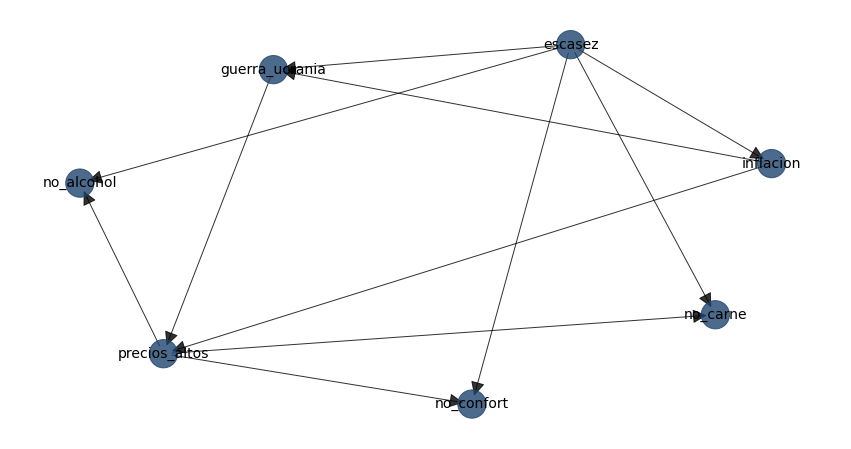

---

[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


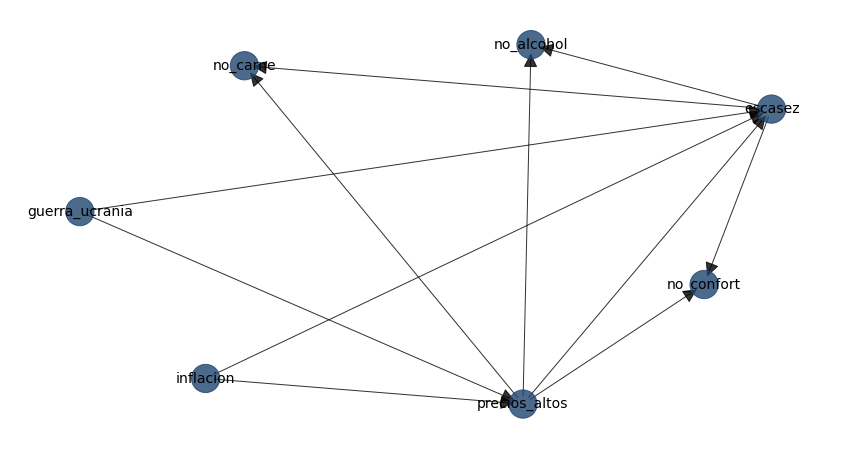

In [ ]:
# Plot
G = bn.plot(DAG)

##Caracteristicas y Elementos de la Red:
Podemos notar entonces que tenemos 7 nodos, los cuales corresponden a:
1.   guerra_ucrania
2.   inflacion
3.   precios_altos
4.   escasez
5.   no_confort
6.   no_carne
7.   no_alcohol

Ademas, del diagrama podemos observar los siguientes parametros por medio de un analisis:


*  $P(escasez)$.

*  $P(inflacion \mid escasez), P(inflacion \mid ¬escasez)$.

*  $P(guerra\_ucrania \mid escasez,inflacion), P(guerra\_ucrania \mid ¬escasez,inflacion), P(guerra\_ucrania \mid escasez,¬inflacion),
 P(guerra\_ucrania \mid ¬escasez,¬inflacion)$

*   $P(precios\_altos \mid guerra\_ucrania,inflacion), P(precios\_altos \mid ¬guerra\_ucrania,inflacion), P(precios\_altos \mid guerra\_ucrania,¬inflacion), P(precios\_altos \mid ¬guerra\_ucrania,¬inflacion)$

*   $P(no\_confort \mid escacez,precios\_altos), P(no\_confort \mid ¬escacez,precios\_altos), P(no\_confort \mid escacez,¬precios\_altos), P(no\_confort \mid ¬escacez,¬precios\_altos)$

*   $P(no\_carne \mid escacez,precios\_altos), P(no\_carne \mid ¬escacez,precios\_altos), P(no\_carne \mid escacez,¬precios\_altos), P(no\_carne \mid ¬escacez,¬precios\_altos)$

*   $P(no\_alcohol \mid escacez,precios\_altos), P(no\_alcohol \mid ¬escacez,precios\_altos), P(no\_alcohol \mid escacez,¬precios\_altos), P(no\_alcohol \mid ¬escacez,¬precios\_altos)$


Por otra parte tenemos la configuracion de los nodos, donde:

*   (escasez -> inflacion -> precios_altos) y (escasez -> guerra_ucrania -> precios_altos) se encuentran en serie.
*   (escasez -> no_alcohool <- precios_altos), (escasez -> no_carne <- precios_altos) y (escasez -> no_confort <- precios_altos) son convergentes.
*   (inflacion <- escasez -> guerra_ucrania), (precios_altos <- inflacion -> guerra_ucrania) son divergentes.






#Inferencias
---
Se procede entonces a hacer el aprendizaje de parametros para tener las Distribuciones de Probabilidad Condicional
(CPD por su sigla en ingles), las cuales serviran para ser analizadas posteriormente en las inferencias:

In [ ]:
model = bn.parameter_learning.fit(DAG, dfnum)

[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Conversion of adjmat to BayesianNetwork.
[bnlearn] >CPD of inflacion:
+--------------+----------+
| inflacion(0) | 0.200327 |
+--------------+----------+
| inflacion(1) | 0.799673 |
+--------------+----------+
[bnlearn] >CPD of precios_altos:
+------------------+-----+---------------------+
| guerra_ucrania   | ... | guerra_ucrania(1)   |
+------------------+-----+---------------------+
| inflacion        | ... | inflacion(1)        |
+------------------+-----+---------------------+
| precios_altos(0) | ... | 0.09951699272087622 |
+------------------+-----+---------------------+
| precios_altos(1) | ... | 0.9004830072791238  |
+------------------+-----+---------------------+
[bnlearn] >CPD of escasez:
+----------------+-----+---------------------+
| guerra_ucrania | ... | guerra_ucrania(1)   |
+----------------+-----+---------------------+
| inflacion      | ... | inflacion(1)        |
+----------------+-----+


Primera inferencia:

"La Probabilidad de que haya escasez, dado que hay precios altos"

"P(escasez|precios_altos=1)"

In [ ]:
inference1 = bn.inference.fit(model, variables = ["escasez"], evidence={'precios_altos':1}, verbose=1)
print(inference1)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+------------+----------------+
| escasez    |   phi(escasez) |
+============+================+
| escasez(0) |         0.3153 |
+------------+----------------+
| escasez(1) |         0.6847 |
+------------+----------------+


El resultado que retorna la funcion se puede leer como:

- "Dado que hay precios altos, la probabilidad de que no haya escasez es 0.315"
- "Dado que hay precios altos, la probabilidad de que haya escasez es 0.685"

Por lo que la probabilidad de que haya escasez dado que hay precios altos es de un 68%

Se puede observar del CPD de escasez (más arriba), que su probabilidad aumento favorablemente para el caso Verdadero.
Ademas si observamos más arriba, en el CPD de precios altos, podemos observar que tiene distribuciones definidas para el caso en que escasez es 1 y la guerra tambien es 1, en este mismo CPD se ve que hay mas probabilidad que haya precios altos, siendo un 90%, por lo cual al definir que si hubo precios altos como parte de nuestra inferencia, cambiaria el modelo, lo cual genera un aumento en la probabilidad de la escasez en un 1.2%

---

Segunda Inferencia:

"Probabilidad de que no haya inflacion, dado que hay alcohol y carne y no hay confort"

"P(inflacion|no_alcohol=0,no_carne=0,no_confort=1)"

In [ ]:
inference2 = bn.inference.fit(model, variables = ["inflacion"], evidence={'no_alcohol':0,'no_carne':0,'no_confort':1},verbose=1)
print(inference2)

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+--------------+------------------+
| inflacion    |   phi(inflacion) |
+==============+==================+
| inflacion(0) |           0.1501 |
+--------------+------------------+
| inflacion(1) |           0.8499 |
+--------------+------------------+


El resultado que retorna la funcion se puede leer como:

- "Dado que hay alcohol y hay carne y no hay confort, la probabilidad de que no haya inflacion es 0.15"
- "Dado que hay alcohol y hay carne y no hay confort, la probabilidad de que haya inflacion es 0.85"

Por lo que la probabilidad de que haya inflacion dado que no hay confort, pero si hay carne y alcohol es de un 85%

En este caso, podriamos asumir que se esta cargando las probabilidades de escasez en los nodos de no_carne, no_cofort y no_alcohol, de esa forma "eliminia" la dependecia que tiene incflacion a escasez y logra determinar cual es la probabilidad de la inflacion, de igual forma, podemos observar que sigue la tendencia de las probabiblidades del CDP de escasez que se encuentra más arriba, ya que la probabilidad de que haya inflacion (inflacion = 1) es:
(escasez = 0) -> 0.78 y (escasez = 1) -> 0.80

---

Tercera inferencia:

"La Probabilidad de que haya guerra en ucrania y no haya inflacion, dado que no hay alcohol ni confort pero si hay carne"

In [ ]:
inference3 = bn.inference.fit(model, variables = ['inflacion','guerra_ucrania'], evidence={'no_alcohol':1,'no_carne':0,'no_confort':1},verbose=1)
print(inference3)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+-------------------+--------------+---------------------------------+
| guerra_ucrania    | inflacion    |   phi(guerra_ucrania,inflacion) |
+===================+==============+=================================+
| guerra_ucrania(0) | inflacion(0) |                          0.0040 |
+-------------------+--------------+---------------------------------+
| guerra_ucrania(0) | inflacion(1) |                          0.0548 |
+-------------------+--------------+---------------------------------+
| guerra_ucrania(1) | inflacion(0) |                          0.1493 |
+-------------------+--------------+---------------------------------+
| guerra_ucrania(1) | inflacion(1) |                          0.7918 |
+-------------------+--------------+---------------------------------+


El resultado que retorna la funcion se puede leer como:

- "Dado que no hay alcohol y hay carne y no hay confort, la probabilidad de que no haya inflacion y no haya guerra en ucrania es de 0.004"
- "Dado que no hay alcohol y hay carne y no hay confort, la probabilidad de que no haya inflacion y haya guerra en ucrania es de 0.1492"
- "Dado que no hay alcohol y hay carne y no hay confort, la probabilidad de que haya inflacion y no haya guerra en ucrania es de 0.0546"
- "Dado que no hay alcohol y hay carne y no hay confort, la probabilidad de que haya inflacion y haya guerra en ucrania es de 0.7921"

Por lo que la probabilidad de que haya guerra en ucrania y no haya inflacion, dado que no hay alcohol ni confort pero si hay carne 14.92%

Este es un caso más complejo de analizar, por que se genera unas probabilidades cruzadas entre guerra_ucrania e inflacion, de hecho si observamos el CPD de mas arriba, solo tenemos probabilidades para cuando la inflacion es 1, donde podemos ver que sigue tambien la tendencia de que dado que hay inflacion, es mas probable que haya guerra en ucrania a que no haya.
De todas formas la informacion pasa a estar contenida en los nodos de no_carne,no_alcohol y no_confort, para luego ser incluidos y expandidos a los nodos de guerra ucrania e inflacion.


---

#Enunciado 2:



In [ ]:
#Importacion de Librerias
import pydtmc as markov
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


#Se define la matriz p por medio de una lista de listas con los valores entregados en el enunciado
p = [
    [0.25,0.06,0.08,0.15,0.04,0.02,0.15,0.15,0.10],
    [0.15,0.15,0.10,0.22,0.01,0.02,0.15,0.10,0.10],
    [0.12,0.00,0.05,0.24,0.14,0.04,0.27,0.07,0.07],
    [0.05,0.13,0.05,0.30,0.10,0.10,0.22,0.05,0.00],
    [0.18,0.20,0.07,0.20,0.15,0.05,0.05,0.05,0.05],
    [0.20,0.10,0.20,0.05,0.05,0.10,0.02,0.15,0.13],
    [0.01,0.05,0.15,0.14,0.17,0.10,0.12,0.10,0.16],
    [0.17,0.15,0.07,0.07,0.15,0.10,0.12,0.09,0.08],
    [0.13,0.11,0.13,0.03,0.20,0.20,0.04,0.15,0.01]
]

#Se crea la cadena de markov con ayuda de la libreria pydtmc
mc = markov.MarkovChain(p, ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9'])

#data Almacenara las distintas probabilidades calculadas en cada iteracion de la forma: {10:{G1:.,G2:...},100:{G1:.,G2:...},...}
data = {}

#random_walks_step funciona como una lista para definir las distintas cantidades de iteraciones de random walks que se haran,
# siempre hace n+1 (en vez de 10, 11)
random_walks_steps =[10,100,1000,5000,10000,20000,50000,80000,100000]

#La funcion walk recibe la cantidad de pasos y una seed para poder reproducir los casos, en caso de querer probar casos distintos, cambiar el 32 por otro numero.
#El siguiente fragmento de codigo lo que hace es recorrer la lista de pasos para realizar cada una de las distintas iteracioes, y luego
# cuenta la cantidad de veces que una banda aparece y lo almacena en el diccionario de ocurrences, luego calcula cada una de las probabilidades
# dividiendo el valor en el total+1, posteriormente almacena esta informacion en la variable data para su posterior uso en el grafico.
for i in random_walks_steps:
  ocurrences = {'G1': 0, 'G2': 0, 'G3': 0, 'G4': 0, 'G5': 0, 'G6': 0, 'G7': 0, 'G8': 0, 'G9': 0}
  random_walk = mc.walk(i, seed=32+i)
  for j in random_walk:
    ocurrences[j]+=1
  probability = {k: v/(i+1) for k, v in ocurrences.items()}
  data[i] = probability
print(f'Ultimo calculo de probabilidad, correspondiente a {i} iteraciones: {probability}')


Ultimo calculo de probabilidad, correspondiente a 100000 iteraciones: {'G1': 0.13019869801301986, 'G2': 0.1045089549104509, 'G3': 0.0945090549094509, 'G4': 0.17225827741722582, 'G5': 0.1103088969110309, 'G6': 0.07831921680783192, 'G7': 0.13725862741372585, 'G8': 0.0970890291097089, 'G9': 0.07554924450755493}


Una vez obtenidos los valores de las probabilidades para las distintas cantidades de iteraciones, se procede a graficar los valores para poder analizar de forma mas visual que pasa con las probabilidades de las bandas:

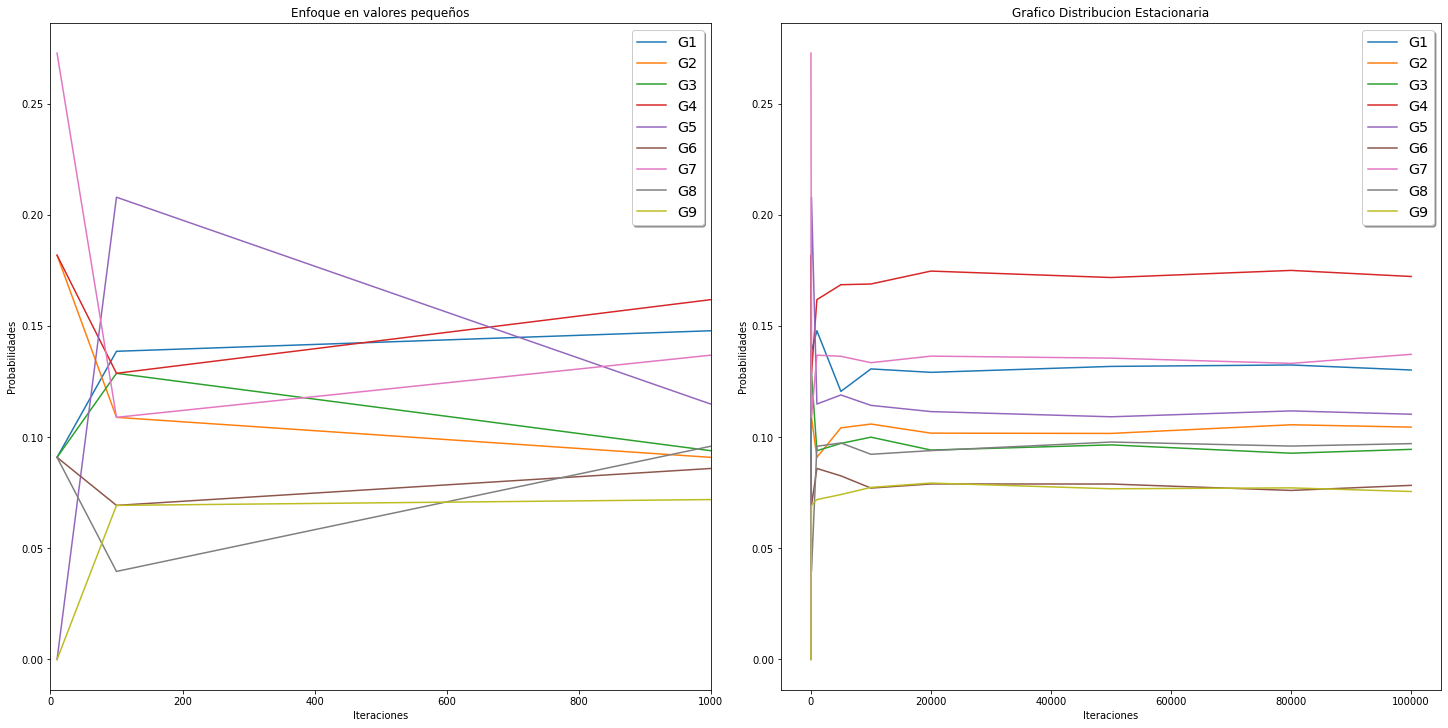

In [ ]:
#Se define la lista de bandas para poder realizar la agrupacion segun el grupo musical en el for que viene luego,
# ademas se genera la figura y los 2 subplots para su posterior graficacion
bands = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9']
graph = plt.figure(figsize=(20, 10), layout='constrained')
plot1 = graph.add_subplot(121)
plot2 = graph.add_subplot(122)

#En el siguiente for, se itera sobre la variable bands para obtener una banda en particular, para la cual luego
# se obtienen todos sus valores de probabilidades en orden y se plotean en los graficos 1 y 2
for band in bands:
  probabilities = [x[band] for _,x in data.items()]
  plot1.plot(data.keys(), probabilities, label=band)
  plot2.plot(data.keys(), probabilities, label=band)

#Configuracion Graficos, se aplican limites, nombres y se crea la leyenda para cada uno
#plot1
plot1.set_xlim([0,1000])
plot1.set_xlabel('Iteraciones')
plot1.set_ylabel('Probabilidades')
plot1.set_title("Enfoque en valores pequeños")
legend1 = plot1.legend(loc='upper right', shadow=True, fontsize='x-large')
#plot2
plot2.set_xlabel('Iteraciones')
plot2.set_ylabel('Probabilidades')
plot2.set_title("Grafico Distribucion Estacionaria")
legend2 = plot2.legend(loc='upper right', shadow=True, fontsize='x-large')

En el grafico anterior podemos notar:

- A medida que la cantidad de random walks va aumentando, el valor de la probabilidad de que cada banda sea escuchada tiende a acercarse a un numero especifico, de hecho podemos ver que pasado los 20000 random walks, las variaciones en los valores de cada P es muy pequeño.
- La banda con mayor probabilidad de ser escuchada es G4 (*Rhapsody of fire*) y la banda con menos probabilidad de ser escuchada puede ser G6 o G9 (*Liquid Tension Experiment* o *Symphony X*)(viendo el ultimo valor graficado, seria G9).
- La mayoria de las probabilidades esta en un rango cercano a los 0.10, de hecho podria decirse que es entre 0.10 y menos de 0.15.
- El usar menos de 1000 random walks no permite ver bien las tendencias de las probabilidades.


Se procede entonces a determinar la matriz de distribucion estacionaria para la cadena de Markov entregada, esto se hara realizando las iteraciones sobre la matriz $T$, partiendo con una matriz de estados $\pi^0$, la cual se multiplicara con $T$ para obtener un estado $\pi^1$  , de esta forma se seguira iterando sobre las mismas hasta que se cumpla que $ \pi ⋅ T =\pi $

In [ ]:
#Se define pi0_matrix, la cual se usa como matriz de estado inicial para el calculo
pi0_matrix = ([1,0,0,0,0,0,0,0,0])

#Se transforma la lista que se definio anteriormente en un arreglo numpy para poder usarlo como matriz
#previos_result se usa para definir el estado anterior de la iteracion
transition_matrix = np.array(p)
previous_result = pi0_matrix

#En un while true, se multiplica la matriz de transicion por el estado actual, para poder obtener el estado siguiente
# se verifica entonces si "estado anterior == estado actual", si se cumple se termina la iteracion, en caso contrario
# previous_result ahora es el estado actual y se vuelve a iterar.
while(True):
  new_result = np.dot(previous_result,transition_matrix)
  if (new_result == previous_result).all(): break
  previous_result = new_result
print(f'Distribucion Estacionaria: {new_result}')

Distribucion Estacionaria: [0.13162585 0.10540776 0.09476106 0.17109049 0.11006619 0.07747712
 0.13687884 0.09640483 0.07628785]


Ademas se utilizara el metodo que proporciona internamente la libreria para calcular la Distribucion estacionaria a modo de verificar que lo que se obtuvo anteriormente esta correcto.

In [ ]:
#Se imprime el valor [0], dado que la funcion retorna un array([...])
print(mc.steady_states[0])

[0.13162585 0.10540776 0.09476106 0.17109049 0.11006619 0.07747712
 0.13687884 0.09640483 0.07628785]


Podemos notar que la distribucion estacionaria fue calculada correctamente, ahora para facilitar la comparacion con los valores que se obtuvieron en la parte anterior de la tarea, se imprimen los valores obtenidos en esa seccion y la matriz calculada anteriormente:

In [ ]:
print(f'Bandas: Grafico | Distribucion')
for i in range(len(bands)):
  print(f'    {bands[i]}: {"{:.5f}".format( probability[bands[i]])} | {"{:.5f}".format( new_result[i])}')

Bandas: Grafico | Distribucion
    G1: 0.13020 | 0.13163
    G2: 0.10451 | 0.10541
    G3: 0.09451 | 0.09476
    G4: 0.17226 | 0.17109
    G5: 0.11031 | 0.11007
    G6: 0.07832 | 0.07748
    G7: 0.13726 | 0.13688
    G8: 0.09709 | 0.09640
    G9: 0.07555 | 0.07629


Realizando una comparacion de los valores obtenidos en ambos casos, podemos observar que el valor al cual tendian las probabilidades del grafico, como se habia mencionado previamente, era realmente la distribucion estacionaria.

Ademas dada la cercania que se observa entre sus valores, donde la diferencia ocurre recien en el orden de $10^{-2}$ para el caso $10^5$ iteraciones de random walks, podriamos asumir que esta diferencia se veria aun más reducida al aumentar la cantidad de iteraciones de random walks en una cantidad considerable, por ejemplo $10^6$ o más, pero esto implicaria un costo de computo mucho mayor, por lo que el metodo generado multiplicando la matriz seria más optimo.